In [10]:
import pandas as pd

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1nvewJbiH2X7hiFTrwkc")
project = rf.workspace("housedetectionclassification-jugwz").project("houses_in_flood")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [11]:
import pandas as pd
from datasets import load_dataset
import yaml
import os

print("Libraries imported successfully.\n")


Libraries imported successfully.



In [12]:
from datasets import load_dataset

ds = load_dataset("melisekm/natural-disasters-from-social-media")


In [13]:
print("Loading Hugging Face text dataset from cache...")
ds = load_dataset("melisekm/natural-disasters-from-social-media")

Loading Hugging Face text dataset from cache...


In [14]:
roboflow_dir = "houses_in_flood-6"
print(f"Roboflow image dataset is located in: {os.path.abspath(roboflow_dir)}\n")

Roboflow image dataset is located in: /content/houses_in_flood-6



In [17]:
import pandas as pd
from datasets import load_dataset
import yaml
import os

print("Libraries imported successfully.\n")


Libraries imported successfully.



In [18]:
## Step 2: Load the datasets
print("Loading Hugging Face text dataset from cache...")
ds = load_dataset("melisekm/natural-disasters-from-social-media")

roboflow_dir = "houses_in_flood-6"
print(f"Roboflow image dataset is located in: {os.path.abspath(roboflow_dir)}\n")


Loading Hugging Face text dataset from cache...
Roboflow image dataset is located in: /content/houses_in_flood-6



In [19]:
## Step 3: Explore the datasets
print("--- Data Exploration on the Hugging Face Dataset ---")
df = ds['train'].to_pandas()

print("\n1. Dataset Information (.info())")
df.info()
print("\n" + "="*50 + "\n")

print("2. Descriptive Statistics (.describe())")
print(df.describe(include='all'))
print("\n" + "="*50 + "\n")

print("3. Missing Values Check (.isnull().sum())")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")


--- Data Exploration on the Hugging Face Dataset ---

1. Dataset Information (.info())
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169109 entries, 0 to 169108
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   text               169109 non-null  object 
 1   target             169109 non-null  int64  
 2   SOURCE_FILE        169109 non-null  object 
 3   tweet_id           156090 non-null  float64
 4   filename           169109 non-null  object 
 5   event_type         169109 non-null  object 
 6   event_type_detail  169109 non-null  object 
 7   label              169109 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.3+ MB


2. Descriptive Statistics (.describe())
                                                     text         target  \
count                                              169109  169109.000000   
unique                                             16910

Libraries imported successfully.

Loading Hugging Face text dataset from cache...

--- Data Exploration on the Hugging Face Dataset ---

1. Dataset Information (.info())
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169109 entries, 0 to 169108
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   text               169109 non-null  object 
 1   target             169109 non-null  int64  
 2   SOURCE_FILE        169109 non-null  object 
 3   tweet_id           156090 non-null  float64
 4   filename           169109 non-null  object 
 5   event_type         169109 non-null  object 
 6   event_type_detail  169109 non-null  object 
 7   label              169109 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.3+ MB


2. Descriptive Statistics (.describe())
                                                     text         target  \
count                                            

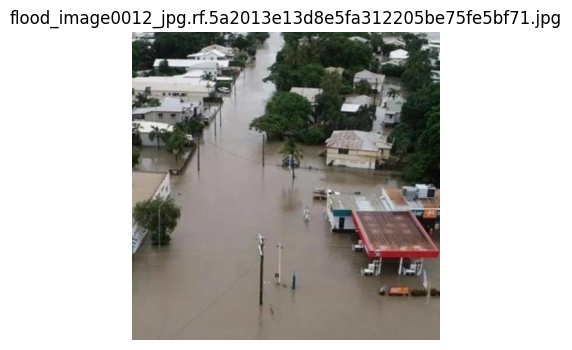

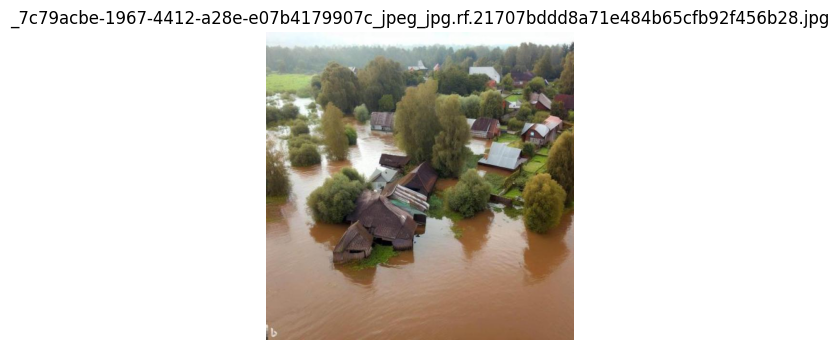

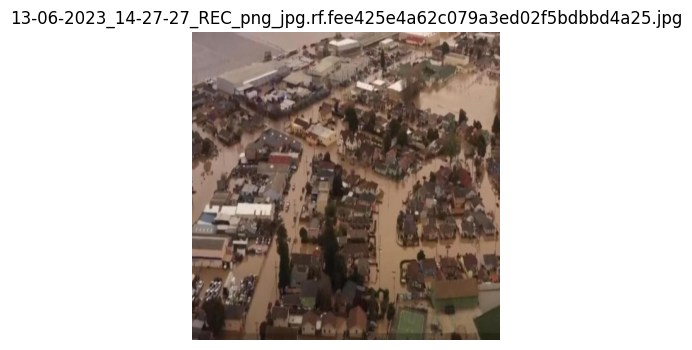

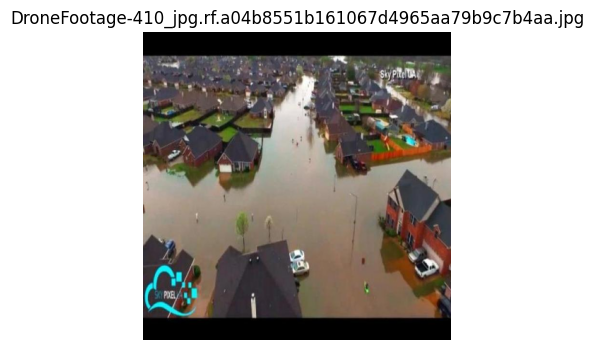

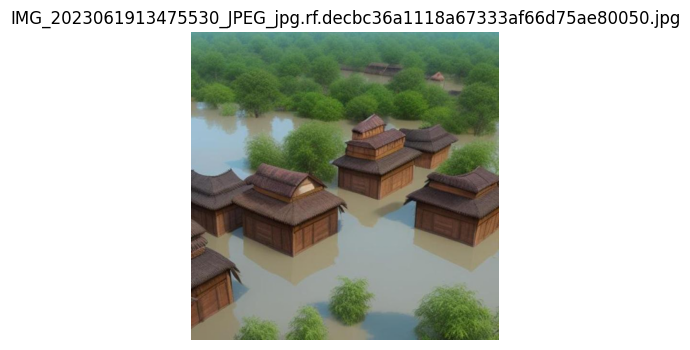

In [22]:
# ================================
# Step 1: Import libraries
# ================================
import pandas as pd
from datasets import load_dataset
import yaml
import os
import matplotlib.pyplot as plt
import cv2

print("Libraries imported successfully.\n")

# ================================
# Step 2: Load Hugging Face Dataset
# ================================
print("Loading Hugging Face text dataset from cache...")
ds = load_dataset("melisekm/natural-disasters-from-social-media")

# Convert to pandas DataFrame
df = ds['train'].to_pandas()

# ================================
# Step 3: Explore Hugging Face Dataset
# ================================
print("\n--- Data Exploration on the Hugging Face Dataset ---")

print("\n1. Dataset Information (.info())")
df.info()
print("\n" + "="*50 + "\n")

print("2. Descriptive Statistics (.describe())")
print(df.describe(include='all'))
print("\n" + "="*50 + "\n")

print("3. Missing Values Check (.isnull().sum())")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

print("4. Target Class Distribution (Disaster vs Non-Disaster)")
print(df['target'].value_counts(normalize=True) * 100)

print("\n" + "="*50 + "\n")

# ================================
# Step 4: Explore Roboflow Dataset
# ================================
print("--- Data Exploration on the Roboflow Image Dataset ---")

# Correct folder name (case-sensitive!)
roboflow_dir = "Houses_in_Flood-6"

# List files inside Roboflow folder
print("\nFiles inside Roboflow dataset directory:")
print(os.listdir(roboflow_dir))

# Load data.yaml
yaml_path = os.path.join(roboflow_dir, "data.yaml")
if os.path.exists(yaml_path):
    with open(yaml_path, "r") as f:
        data_yaml = yaml.safe_load(f)

    print("\nClasses in dataset:", data_yaml.get("names", []))
    print("Number of classes:", data_yaml.get("nc", "Not found"))
else:
    print(f"Error: {yaml_path} not found. Please check dataset export.")

# ================================
# Step 5: Visualize Sample Images
# ================================
# Show a few sample images from dataset/images folder (YOLO format export usually has this)
images_dir = os.path.join(roboflow_dir, "train", "images")

if os.path.exists(images_dir):
    sample_images = os.listdir(images_dir)[:5]  # first 5 images
    print("\nShowing sample images:")

    for img_name in sample_images:
        img_path = os.path.join(images_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(img_name)
        plt.axis("off")
        plt.show()
else:
    print("Images folder not found inside dataset. Please confirm dataset structure.")
